# pandas 


## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy* 

**1.** Import pandas under the name `pd`.

In [ ]:
import pandas as pd

**2.** Print the version of pandas that has been imported.

In [ ]:
pd.__version__

'1.3.5'

**3.** Print out all the version information of the libraries that are required by the pandas library.

In [ ]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 66e3805b8cabe977f40c05259cc3fcf7ead5687d
python           : 3.7.13.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.10.133+
Version          : #1 SMP Fri Aug 26 08:44:51 UTC 2022
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.3.5
numpy            : 1.21.6
pytz             : 2022.2.1
dateutil         : 2.8.2
pip              : 21.1.3
setuptools       : 57.4.0
Cython           : 0.29.32
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.6
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.9.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.9.3 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 7.9.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 

## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [ ]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [ ]:
df = pd.DataFrame(data = data,index = labels)

In [ ]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**5.** Display a summary of the basic information about this DataFrame and its data.

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**6.** Return the first 3 rows of the DataFrame `df`.

In [ ]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [ ]:
animal = df['animal']
age = df['age']

**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [ ]:
#df.iloc[[3,4,8]][['animal','age']]
df.loc[df.index[[3,4,8]],['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [ ]:
df[df['visits']>3]


,animal,age,visits,priority


**10.** Select the rows where the age is missing, i.e. is `NaN`.

In [ ]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [ ]:
df[(df['animal'] == 'cat') & (df['age']<3) ]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [ ]:
df[(df['age']>=2) & (df['age']<=4) ]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**13.** Change the age in row 'f' to 1.5.

In [ ]:
df.loc['f','age'] = 1.5


**14.** Calculate the sum of all visits (the total number of visits).

In [ ]:
df['visits'].sum()

19

**15.** Calculate the mean age for each different animal in `df`.

In [ ]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [ ]:
df.loc['k'] = ['giraffe',5,2,'yes']

In [ ]:
df.drop('k')

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**17.** Count the number of each type of animal in `df`.

In [ ]:
df['animal'].value_counts()

cat        4
dog        4
snake      2
giraffe    1
Name: animal, dtype: int64

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order.

In [ ]:
df.sort_values('visits')

,animal,age,visits,priority
a,cat,2.5,1,yes
g,snake,4.5,1,no
h,cat,NaN,1,yes
j,dog,3.0,1,no
c,snake,0.5,2,no
e,dog,5.0,2,no
i,dog,7.0,2,no
k,giraffe,5.0,2,yes
b,cat,3.0,3,yes
d,dog,NaN,3,yes


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [ ]:
df['priority']  = df['priority'].map({'yes':True,'no': False})

In [ ]:
df.head()

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False


**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [ ]:
df['animal'] = df['animal'].replace('snake','python')

**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [ ]:
#df.groupby(['animal','visits'])['age'].mean()
df.pivot_table(index = 'animal',columns = 'visits',aggfunc='mean',values = 'age',dropna =True)

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
giraffe,NaN,5.0,NaN
python,4.5,0.5,NaN


In [ ]:
S1=pd.Series([1,2,3,4])
S2=pd.Series([7,8])
print((S1+S2).count())

2


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

In [ ]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df.loc[df['A'].shift() != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [ ]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
df_new = df.subtract(df.mean(axis =1), axis = 0)
print('Dataframe :\n',df)
print(df_new)


Dataframe :
           0         1         2
0  0.723514  0.355274  0.830406
1  0.361761  0.182712  0.749752
2  0.713404  0.879445  0.231082
3  0.963666  0.038445  0.446617
4  0.219592  0.102515  0.837651
          0         1         2
0  0.087116 -0.281124  0.194008
1 -0.069647 -0.248696  0.318343
2  0.105427  0.271468 -0.376895
3  0.480757 -0.444464 -0.036292
4 -0.166994 -0.284071  0.451065


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? (Find that column's label.)

In [ ]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
print(df.sum(axis = 0 ))
print('Column label :',df.sum(axis =0).idxmin(axis = 0))

a    2.172096
b    2.704923
c    1.777800
d    2.934837
e    2.406086
f    3.405018
g    2.049763
h    3.308743
i    2.140095
j    1.849370
dtype: float64
Column label : c


**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

In [ ]:
df = pd.DataFrame({

    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]

})

len(df.drop_duplicates(subset = ['brand']))

2

The next three puzzles are slightly harder...

**26.** You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the *column* which contains the *third* NaN value.

(You should return a Series of column labels.)

**27.** A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example: 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.

In [ ]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
df.groupby('grps')['vals'].nlargest(3).sum(level =0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  This is separate from the ipykernel package so we can avoid doing imports until


grps
a    409
b    156
c    345
Name: vals, dtype: int64

**28.** A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

In [ ]:
df = pd.DataFrame(np.random.randint(101,size=(30, 2)), columns=['A','B'])
print(df)
df.groupby(pd.cut(df['A'],bins = np.arange(0,31,10)))['B'].sum()

      A   B
0    92  60
1    50  76
2    96   3
3     2  67
4    73  53
5    89  31
6    29  75
7    59  70
8    63  55
9    28   9
10   45   0
11   45  79
12   40  76
13   61   8
14    5  34
15   79  89
16   20  86
17   97  49
18   52  84
19   75  77
20   60  98
21   51  13
22   49  95
23   52  39
24    1  17
25   85  40
26   87  67
27   20  86
28  100  91
29   38  93


A
(0, 10]     118
(10, 20]    172
(20, 30]     84
Name: B, dtype: int64

## DataFrames: harder problems 

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be `[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]`. Make this a new column 'Y'.

In [ ]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

Here's an alternative approach based on a [cookbook recipe](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#grouping):

**30.** Consider a DataFrame containing rows and columns of purely numerical data. Create a list of the row-column index locations of the 3 largest values.

**31.** Given a DataFrame with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals', replace any negative values in 'vals' with the group mean.

**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [ ]:
df_index =pd.date_range(start = '2015-01-01',end = '2015-12-31', freq ='D')
# Another way to get datetimeindex
##df_index =pd.date_range(start = '2015-01-01', periods =365, freq ='D')
s = pd.DataFrame(np.random.randint(366,size=(1,365)).T ,
                   columns = ['X'],index= df_index)
s

,X
2015-01-01,93
2015-01-02,48
2015-01-03,14
2015-01-04,151
2015-01-05,324
...,...
2015-12-27,164
2015-12-28,254
2015-12-29,329
2015-12-30,290


**34.** Find the sum of the values in `s` for every Wednesday.

In [ ]:
#print(s.groupby(s.index.weekday).sum())
print(s[s.index.weekday ==2].sum())


X    10222
dtype: int64


**35.** For each calendar month in `s`, find the mean of values.

In [ ]:
print(s.groupby(s.index.month).mean())
# Another method
## s.resample('M').mean()

             X
1   180.806452
2   210.428571
3   179.516129
4   201.166667
5   197.419355
6   173.833333
7   174.870968
8   197.935484
9   181.933333
10  212.483871
11  136.600000
12  186.935484


**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [ ]:
print(s.groupby(pd.Grouper(freq = '4M')).idxmax())

                    X
2015-01-31 2015-01-21
2015-05-31 2015-04-04
2015-09-30 2015-09-18
2016-01-31 2015-12-03


**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [ ]:
pd.date_range(start = '2015-01-01',end='2016-12-31',freq = 'WOM-3THU') # freq = Week of the month -3 ,Thursday
# More on frequency alias here :https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
(It's some flight data I made up; it's not meant to be accurate in any way.)


**38.** Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [ ]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


**39.** The From\_To column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

In [ ]:

df_new['From'] = df['From_To'].str.split("_").str.get(0)
df_new['To'] = df['From_To'].str.split("_").str.get(1)
#df_new = df.From_To.str.split('_', expand = True)
#df_new.columns = ['From','To']

In [ ]:
df_new

,0,1,2,From,To
0,0.087116,-0.281124,0.194008,LoNDon,paris
1,-0.069647,-0.248696,0.318343,MAdrid,miLAN
2,0.105427,0.271468,-0.376895,londON,StockhOlm
3,0.480757,-0.444464,-0.036292,Budapest,PaRis
4,-0.166994,-0.284071,0.451065,Brussels,londOn


**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [ ]:
df_new['From'] =df_new['From'].str.capitalize()
df_new['To'] =df_new['To'].str.capitalize()

**41.** Delete the From_To column from `df` and attach the temporary DataFrame from the previous questions.

In [ ]:
df = df.drop(labels = 'From_To', axis =1)
df = df.join(df_new)

In [ ]:
df

,FlightNumber,RecentDelays,Airline,0,1,2,From,To
0,10045.0,"[23, 47]",KLM(!),0.087116,-0.281124,0.194008,London,Paris
1,NaN,[],<Air France> (12),-0.069647,-0.248696,0.318343,Madrid,Milan
2,10065.0,"[24, 43, 87]",(British Airways. ),0.105427,0.271468,-0.376895,London,Stockholm
3,NaN,[13],12. Air France,0.480757,-0.444464,-0.036292,Budapest,Paris
4,10085.0,"[67, 32]","""Swiss Air""",-0.166994,-0.284071,0.451065,Brussels,London


**42**. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [ ]:
df['Airline'] = df['Airline'].str.replace(r'[^\w\s]+','') #[^\w\s] - exclude alpha-numeric and white space regex, in .repalce method

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [ ]:
df = df.join(pd.DataFrame(df['RecentDelays'].to_list() ,columns = ['delay_1','delay_2','delay_3']))
df.drop('RecentDelays', axis =1)

,FlightNumber,Airline,0,1,2,From,To,delay_1,delay_2,delay_3
0,10045.0,KLM,0.087116,-0.281124,0.194008,London,Paris,23.0,47.0,NaN
1,NaN,Air France 12,-0.069647,-0.248696,0.318343,Madrid,Milan,NaN,NaN,NaN
2,10065.0,British Airways,0.105427,0.271468,-0.376895,London,Stockholm,24.0,43.0,87.0
3,NaN,12 Air France,0.480757,-0.444464,-0.036292,Budapest,Paris,13.0,NaN,NaN
4,10085.0,Swiss Air,-0.166994,-0.284071,0.451065,Brussels,London,67.0,32.0,NaN


The DataFrame should look much better now.

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels. 

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [ ]:
letters = ['A', 'B', 'C']
numbers = list(range(10))
iterables = [letters,numbers]
idx =pd.MultiIndex.from_product(iterables)#names=['letter','numbers']
s = pd.DataFrame(np.random.randint(31,size= (30,1)),index = idx)

**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [ ]:
s.index.is_lexsorted()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: MultiIndex.is_lexsorted is deprecated as a public function, users should use MultiIndex.is_monotonic_increasing instead.
  """Entry point for launching an IPython kernel.


True

In [ ]:
s

0
A 0  17
  1   8
  2   4
  3  27
  4   1
  5   9
  6  28
  7  12
  8   7
  9   7
B 0  29
  1   7
  2  14
  3  13
  4   9
  5  21
  6  10
  7  29
  8   1
  9  13
C 0  28
  1  30
  2  30
  3  19
  4   3
  5  18
  6  21
  7  25
  8  24
  9  29

**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [ ]:
s.loc[(['A','B','C'], [1,3,5]),:]

0
A 1   8
  3  27
  5   9
B 1   7
  3  13
  5  21
C 1  30
  3  19
  5  18

**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [ ]:
s.loc[(slice(None,'B'),slice(5,None) ), :]

0
A 5   9
  6  28
  7  12
  8   7
  9   7
B 5  21
  6  10
  7  29
  8   1
  9  13

**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [ ]:
# s.sum(level =1) at level 1
# At level 0
# Another way : s.unstack().sum(axis =1)
s.sum(level =0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  after removing the cwd from sys.path.


,0
A,120
B,146
C,227


**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [ ]:
print(s.unstack())
s.unstack().sum(axis =0)

    0                                   
    0   1   2   3  4   5   6   7   8   9
A  17   8   4  27  1   9  28  12   7   7
B  29   7  14  13  9  21  10  29   1  13
C  28  30  30  19  3  18  21  25  24  29


0  0    74
   1    45
   2    48
   3    59
   4    13
   5    48
   6    59
   7    66
   8    32
   9    49
dtype: int64

**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [ ]:
s_prime = s.swaplevel(0,1,axis = 0)

if not s_prime.index.is_lexsorted() :
    s_prime = s_prime.sort_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: MultiIndex.is_lexsorted is deprecated as a public function, users should use MultiIndex.is_monotonic_increasing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
s_prime

0
0 A  17
  B  29
  C  28
1 A   8
  B   7
  C  30
2 A   4
  B  14
  C  30
3 A  27
  B  13
  C  19
4 A   1
  B   9
  C   3
5 A   9
  B  21
  C  18
6 A  28
  B  10
  C  21
7 A  12
  B  29
  C  25
8 A   7
  B   1
  C  24
9 A   7
  B  13
  C  29

## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with [Minesweeper](https://en.wikipedia.org/wiki/Minesweeper_(video_game). If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [ ]:
X = 5
Y = 4
# Obtaining the dataset 1
data1 = pd.DataFrame({'x': np.arange(X)})
  
# Obtaining the dataset 2
data2 = pd.DataFrame({'y': np.arange(Y)})
  
# Doing cartesian product of datasets 1 and 2 
df= pd.merge(data1.assign(key=1), data2.assign(key=1), 
                 on='key').drop('key', axis=1)
  
# Printing the cartesian product of both datasets
print(df)


    x  y
0   0  0
1   0  1
2   0  2
3   0  3
4   1  0
5   1  1
6   1  2
7   1  3
8   2  0
9   2  1
10  2  2
11  2  3
12  3  0
13  3  1
14  3  2
15  3  3
16  4  0
17  4  1
18  4  2
19  4  3


In [ ]:
data1.assign(key=1)

,x,key
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [ ]:
# One way is to draw samples from a binomial distribution.
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
df['mine'] = np.random.binomial(n = 1, p = 0.5, size = X*Y)
df

,x,y,mine
0,0,0,0
1,0,1,0
2,0,2,1
3,0,3,1
4,1,0,1
5,1,1,1
6,1,2,0
7,1,3,1
8,2,0,1
9,2,1,1


**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid. 

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [ ]:
#@title concepts formation: { vertical-output: true, display-mode: "form" }
df1 = pd.DataFrame({'lkey': np.arange(3)})
df2 = pd.DataFrame({'rkey': np.arange(3)})
df3 = pd.merge(df1.assign(key = 0),df2.assign(key =0), on = 'key' ).drop('key',axis =1)
df3['bomb'] = np.random.binomial(n = 1, p = 0.4, size = 3*3)
print(df3)
df3 + [ 1,  1, 0]
df3.merge(df3 + [ 1,  1, 0], on=['lkey', 'rkey'], how='left')

   lkey  rkey  bomb
0     0     0     0
1     0     1     0
2     0     2     0
3     1     0     0
4     1     1     1
5     1     2     1
6     2     0     0
7     2     1     1
8     2     2     1


,lkey,rkey,bomb_x,bomb_y
0,0,0,0,NaN
1,0,1,0,NaN
2,0,2,0,NaN
3,1,0,0,NaN
4,1,1,1,0.0
5,1,2,1,0.0
6,2,0,0,NaN
7,2,1,1,0.0
8,2,2,1,1.0


In [ ]:
df.merge(df + [ 1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df.merge(df + [ 1,  -1, 0], on=['x', 'y'], how='left'))\
      .merge(df + [-1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1, -1, 0], on=['x', 'y'], how='left').iloc[:,:]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mine_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


,x,y,mine_x,mine_y,mine_x,mine_y
0,0,0,0,NaN,NaN,1.0
1,0,1,0,NaN,1.0,0.0
2,0,2,1,NaN,1.0,1.0
3,0,3,1,NaN,0.0,NaN
4,2,2,0,1.0,1.0,1.0
5,4,1,0,1.0,NaN,NaN
6,4,2,0,1.0,NaN,NaN


In [ ]:
"""
        Count all the mines in the 8 adjacent
        cells
 
            N.W   N   N.E
              \   |   /
               \  |  /
            W----Cell----E
                 / | \
               /   |  \
            S.W    S   S.E
 
        Cell-->Current Cell (row, col)
        N -->  North        (row-1, col)
        S -->  South        (row+1, col)
        E -->  East         (row, col+1)
        W -->  West            (row, col-1)
        N.E--> North-East   (row-1, col+1)
        N.W--> North-West   (row-1, col-1)
        S.E--> South-East   (row+1, col+1)
        S.W--> South-West   (row+1, col-1)
"""
# [1,1,0]- N.E direction for zero mine grid
df['adjacent'] = \
    df.merge(df + [ 1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 0,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 0, -1, 0], on=['x', 'y'], how='left')\
       .iloc[:, 3:]\
        .sum(axis=1)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mine_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


In [ ]:
df.head()

,x,y,mine,adjacent
0,0,0,0,2.0
1,0,1,0,3.0
2,0,2,1,3.0
3,0,3,1,2.0
4,1,0,1,3.0


**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [ ]:
df.loc[df['mine'] == 1, 'adjacent'] = np.nan

In [ ]:
df.head()

,x,y,mine,adjacent
0,0,0,0,2.0
1,0,1,0,3.0
2,0,2,1,NaN
3,0,3,1,NaN
4,1,0,1,NaN


**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [ ]:
df.drop('mine', axis=1).set_index(['y', 'x']).unstack()

adjacent                   
x        0    1    2   3    4
y                            
0      2.0  NaN  NaN NaN  NaN
1      3.0  NaN  NaN NaN  4.0
2      NaN  5.0  6.0 NaN  3.0
3      NaN  NaN  3.0 NaN  2.0

## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

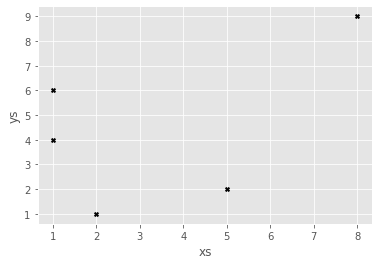

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

df.plot.scatter(x = 'xs',y = 'ys',color = 'black', marker ='X')

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

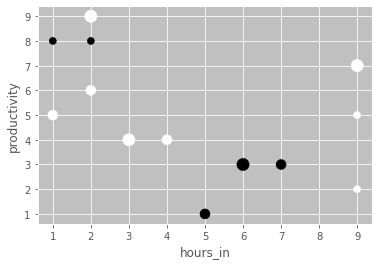

In [ ]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
plt.rcParams['axes.facecolor'] = 'silver'
df.plot.scatter(x= 'hours_in', y='productivity',c=df.caffienated*50,s = df.happiness*50 )

**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

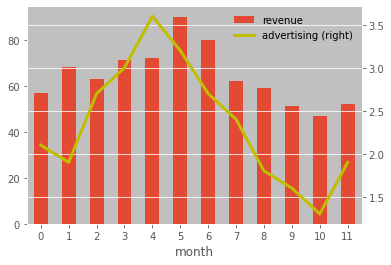

In [ ]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
axes = df.plot.bar(x= 'month', y = 'revenue')
df.plot.line(x= 'month',y = 'advertising', color = 'y',secondary_y =True, ax =axes,linewidth =3)

Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.

In [ ]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [ ]:
df = day_stock_data()

In [ ]:
df.head()

,time,price
0,2022-09-14 09:30:00,100.000000
1,2022-09-14 09:30:07,99.948581
2,2022-09-14 09:30:12,99.947306
3,2022-09-14 09:30:15,100.022030
4,2022-09-14 09:30:19,99.976146


In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
df.set_index("time", inplace = True)
agg = df.resample("H").ohlc()
agg

price                                    
                           open        high         low       close
time                                                               
2022-09-14 09:00:00  100.000000  102.058411   99.055090  100.923152
2022-09-14 10:00:00  100.989956  102.141392  100.434894  101.261876
2022-09-14 11:00:00  101.173248  101.447482   97.825749   98.458167
2022-09-14 12:00:00   98.361008  101.524763   98.271970  101.082540
2022-09-14 13:00:00  101.152659  102.183697  100.065007  101.679513
2022-09-14 14:00:00  101.709748  102.001192   99.852925   99.981182
2022-09-14 15:00:00  100.015204  100.905946   97.708898   99.062649

In [ ]:
agg.columns = agg.columns.droplevel()
agg

,open,high,low,close
time,,,,
2022-09-14 09:00:00,100.000000,102.058411,99.055090,100.923152
2022-09-14 10:00:00,100.989956,102.141392,100.434894,101.261876
2022-09-14 11:00:00,101.173248,101.447482,97.825749,98.458167
2022-09-14 12:00:00,98.361008,101.524763,98.271970,101.082540
2022-09-14 13:00:00,101.152659,102.183697,100.065007,101.679513
2022-09-14 14:00:00,101.709748,102.001192,99.852925,99.981182
2022-09-14 15:00:00,100.015204,100.905946,97.708898,99.062649


In [ ]:
agg["color"] = (agg.close > agg.open).map({True:"green",False:"red"})
agg.head()

,open,high,low,close,color
time,,,,,
2022-09-14 09:00:00,100.000000,102.058411,99.055090,100.923152,green
2022-09-14 10:00:00,100.989956,102.141392,100.434894,101.261876,green
2022-09-14 11:00:00,101.173248,101.447482,97.825749,98.458167,red
2022-09-14 12:00:00,98.361008,101.524763,98.271970,101.082540,green
2022-09-14 13:00:00,101.152659,102.183697,100.065007,101.679513,green


**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

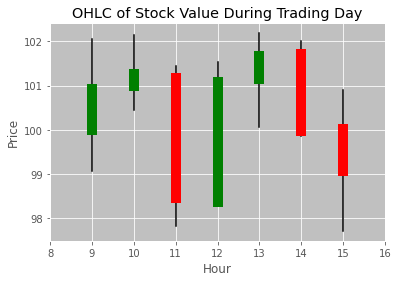

In [ ]:
plot_candlestick(agg)